# Inaugural Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from scipy import optimize

In [2]:
from ExchangeEconomy import ExchangeEconomyClass

# Question 1

**Explain how you solve the model**

In [3]:
#1

model=ExchangeEconomyClass()

par = model.par

uA_endowment=model.utility_A(par.w1A,par.w2A)
uB_endowment=model.utility_B(1-par.w1A,1-par.w2A)

N=75
xlist=[]

# We make a for loop that saves the values that satisfy the conditions

for x1A in np.linspace(0,1,N+1):
    for x2A in np.linspace(0,1,N+1):
        x1B = 1-x1A
        x2B = 1- x2A
        uA = model.utility_A(x1A,x2A)
        uB = model.utility_B(x1B,x2B)

        if uA >= uA_endowment and uB >= uB_endowment:
            xlist.append((x1A,x2A))

# We save the values to use in the edgeworth box
x_values, y_values = zip(*xlist)
print(list)

<class 'list'>


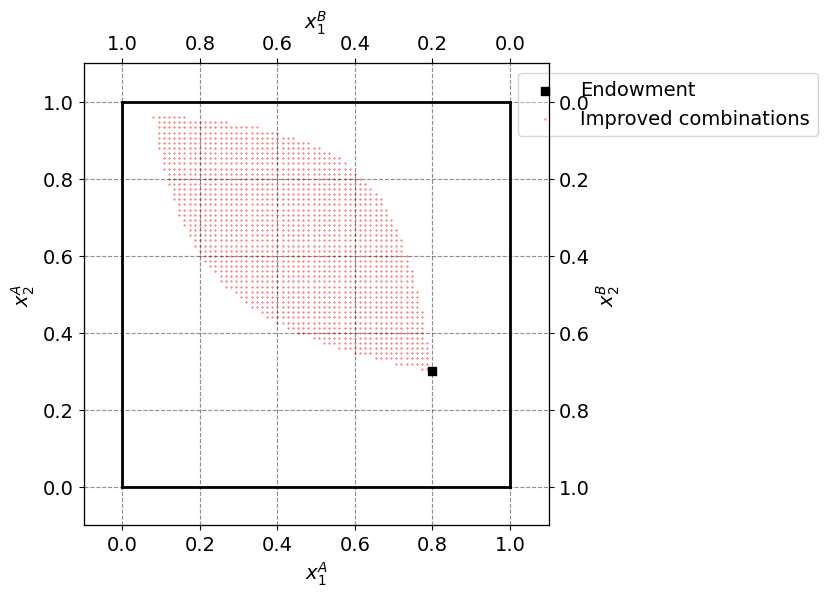

# Question 2

Explain your code and procedure

In [5]:
#2
# To calculate the error in the market clearing condition, we find the excess demand in the market for 
# every price in the range given.

economy = ExchangeEconomyClass()

N = 75  
epsilons = []
p1_values = np.linspace(0.5, 2.5, N+1)
for p1 in p1_values:
    eps1, eps2 = economy.check_market_clearing(p1)
    epsilons.append((p1, eps1, eps2))

# Display the results
for eps in epsilons:
    print(f'p1 = {eps[0]:.3f}, eps1 = {eps[1]:.3f}, eps2 = {eps[2]:.3f}')

p1 = 0.500, eps1 = 0.533, eps2 = -0.267
p1 = 0.527, eps1 = 0.476, eps2 = -0.251
p1 = 0.553, eps1 = 0.424, eps2 = -0.235
p1 = 0.580, eps1 = 0.377, eps2 = -0.219
p1 = 0.607, eps1 = 0.334, eps2 = -0.203
p1 = 0.633, eps1 = 0.295, eps2 = -0.187
p1 = 0.660, eps1 = 0.259, eps2 = -0.171
p1 = 0.687, eps1 = 0.225, eps2 = -0.155
p1 = 0.713, eps1 = 0.194, eps2 = -0.139
p1 = 0.740, eps1 = 0.166, eps2 = -0.123
p1 = 0.767, eps1 = 0.139, eps2 = -0.107
p1 = 0.793, eps1 = 0.114, eps2 = -0.091
p1 = 0.820, eps1 = 0.091, eps2 = -0.075
p1 = 0.847, eps1 = 0.069, eps2 = -0.059
p1 = 0.873, eps1 = 0.049, eps2 = -0.043
p1 = 0.900, eps1 = 0.030, eps2 = -0.027
p1 = 0.927, eps1 = 0.012, eps2 = -0.011
p1 = 0.953, eps1 = -0.006, eps2 = 0.005
p1 = 0.980, eps1 = -0.022, eps2 = 0.021
p1 = 1.007, eps1 = -0.037, eps2 = 0.037
p1 = 1.033, eps1 = -0.052, eps2 = 0.053
p1 = 1.060, eps1 = -0.065, eps2 = 0.069
p1 = 1.087, eps1 = -0.079, eps2 = 0.085
p1 = 1.113, eps1 = -0.091, eps2 = 0.101
p1 = 1.140, eps1 = -0.103, eps2 = 0.117


# Question 3

Explain your code and procedure

In [6]:
#3

# Initialize best values to track the smallest absolute market excess demand
eps1best = np.inf
p1best = np.nan

# We Loop over the p1 values and find the one that minimizes the absolute excess demand for good x1
for p1 in p1_values:
    eps1, eps2 = economy.check_market_clearing(p1)
    if np.abs(eps1) < eps1best:
        eps1best = np.abs(eps1)
        p1best = p1

# We calculate the market clearing error at the best p1 found
eps1_clear, eps2_clear = economy.check_market_clearing(p1best)

p1best, eps1_clear, eps2_clear

# We find that The market-clearing price for good x1 (p1) is approximately 0.953, 
# where the absolute excess demand for good x1 (ε1) is closest to zero, at approximately -0.0056. 
# At this price, the excess demand for good x2 (ε2) is approximately 0.00533.

(0.9533333333333334, -0.00559440559440566, 0.005333333333333523)

# Question 4

In [7]:
#4a 

# We ensure that it does not attempt to calculate utility with negative allocations
def uA(x1A, x2A, model):
    # No negative numbers to a fractional power
    if x1A <= 0 or x2A <= 0:
        return -np.inf
    return model.utility_A(x1A, x2A)


p1best = np.nan
uAbest = -np.inf

# We loop over the p1 values and find the one that maximizes consumer A's utility
for p1 in np.linspace(0.5, 2.5, N+1):
    # Compute the allocation for consumer B based on p1
    x1B, x2B = economy.demand_B(p1)
    # Calculate the allocation for consumer A, ensuring they are non-negative
    x1A = max(1 - x1B, 0)
    x2A = max(1 - x2B, 0)
    # Compute the utility for consumer A based on their allocation
    uA_current = uA(x1A, x2A, economy)
    # Update best utility and corresponding price if current utility is greater
    if uA_current > uAbest:
        uAbest = uA_current
        p1best = p1



# So the price that maximizes utility is 1.887 with a corresponding utility of 0.634




In [8]:
#4b

# We use the same code as before but just change the range of the max function

def uA(x1A, x2A, model):
    if x1A <= 0 or x2A <= 0:
        return -np.inf
    return model.utility_A(x1A, x2A)


p1best = np.nan
uAbest = -np.inf

# We change the range in P1 from just abouve 0 and we assume a reasonable upper bound for p1 for computational purposes.
for p1 in np.linspace(0.01,10,100):
    x1B, x2B = economy.demand_B(p1)
    x1A = max(1 - x1B, 0)
    x2A = max(1 - x2B, 0)
    uA_current = uA(x1A, x2A, economy)
    if uA_current > uAbest:
        uAbest = uA_current
        p1best = p1

p1best, uAbest

# Now we get that the price that max utility is 1.927 with a corresponding utility of 0.634



(1.9272727272727272, 0.633597798192157)

# Question 5

In [9]:
#5A

# We have already have made a list that saves values in C "xlist"
uA_C = -np.inf
x1A_C= np.nan
x2A_C= np.nan

# We ensure that the new endowment is now worse than the initial endowment given in the assignment. 

for x1A, x2A in xlist:
    if model.utility_A(x1A,x2A) > uA_C:
        uA_C = model.utility_A(x1A,x2A)
        x1A_C= x1A
        x2A_C= x2A

print(f'uB = {model.utility_B(1-x1A_C,1-x2A_C):.3f} uA = {uA_C:.3f} (x1,x2) = ({x1A_C:.3f}, {x2A_C:.3f})')


uB = 0.305 uA = 0.742 (x1,x2) = (0.560, 0.853)


In [10]:
#5B

# We specify an inequality type and a lambda function
# We ensuring that consumer B is not worse off than at their initial endowment.
constraints = ({'type':'ineq', 'fun': lambda x: model.utility_B(1-x[0],1-x[1]) - model.utility_B(1-model.par.w1A, 1-model.par.w2A)})
bounds = [(0,1),(0,1)]

# We "guess" from the values found in 5a as a starting point, this i because we expect the result to be close to that of 5a
initial_guess = [x1A_C, x2A_C]

# We minimize the negative utility, therefor maximizing utility of A from the values of x1 and x2.
res = optimize.minimize(lambda x: -model.utility_A(x[0],x[1]),initial_guess,method='SLSQP',bounds=bounds,constraints=constraints)

print(res)

print(f'uB = {model.utility_B(1-res.x[0],1-res.x[1]):.3f}' f' uA = {-res.fun:.3f} (x1,x2) = ({res.x[0]:.3f}, {res.x[1]:.3f})')


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.7432276357675379
       x: [ 5.758e-01  8.444e-01]
     nit: 4
     jac: [-4.303e-01 -5.868e-01]
    nfev: 12
    njev: 4
uB = 0.304 uA = 0.743 (x1,x2) = (0.576, 0.844)


# Question 6

In [11]:
#6a

# Set bounds for optimization variables and initial guess.
bounds = [(0, 1), (0, 1)]
initial_guess = [0.5, 0.5]

# Optimize the combined negative utilities of A and B using the SLSQP method.
res = optimize.minimize(
    lambda x: -model.utility_A(x[0], x[1]) - model.utility_B(1-x[0], 1-x[1]),
    initial_guess, method='SLSQP', bounds=bounds
)

# Print the optimized variables and the resulting utilities for A and B.
print(f'(x1A,x2A) = ({res.x[0]:.4f}, {res.x[1]:.4f}) -> uA = {model.utility_A(res.x[0], res.x[1]):.4f}')
print(f'(x1B,x2B) = ({1-res.x[0]:.4f}, {1-res.x[1]:.4f}) -> uB = {model.utility_B(1- res.x[0], 1- res.x[1]):.4f}')

(x1A,x2A) = (0.3334, 0.6666) -> uA = 0.5291
(x1B,x2B) = (0.6666, 0.3334) -> uB = 0.5291


In [12]:
#6b

#in question 6 the total utility is 1.0582 which is higher than the total utility in questions 4 and 5 which could be seen as a pro depending on your preferences.
#However in 4 and 5 A gets a higher utility which could also be seen as a pro depending on your preferences.


# Question 7

In [13]:
#7

np.random.seed(1234)

# Define the number of samples
N = 50

# Generate random samples for w1A and w2A within the range [0, 1]
w1A_W = np.random.uniform(low=0, high=1, size=N)
w2A_W = np.random.uniform(low=0, high=1, size=N)

# Pair up w1A and w2A samples
w = list(zip(w1A_W, w2A_W))

print(w)


[(0.1915194503788923, 0.11189431757440382), (0.6221087710398319, 0.6071937062184846), (0.4377277390071145, 0.5659446430505314), (0.7853585837137692, 0.00676406199000279), (0.7799758081188035, 0.617441708804297), (0.2725926052826416, 0.9121228864331543), (0.2764642551430967, 0.7905241330570334), (0.8018721775350193, 0.9920814661883615), (0.9581393536837052, 0.9588017621528665), (0.8759326347420947, 0.7919641352916398), (0.35781726995786667, 0.2852509600245098), (0.5009951255234587, 0.624916705305911), (0.6834629351721363, 0.47809379567067456), (0.7127020269829002, 0.19567517866589823), (0.37025075479039493, 0.38231745203150647), (0.5611961860656249, 0.05387368514623658), (0.5030831653078097, 0.45164840826085906), (0.013768449590682241, 0.9820047415219545), (0.772826621612374, 0.12394270048696299), (0.8826411906361166, 0.1193808979262484), (0.3648859839013723, 0.7385230561433468), (0.6153961784334937, 0.5873036334639846), (0.07538124164297655, 0.4716325343203678), (0.3688240060019745, 0.

# Question 8

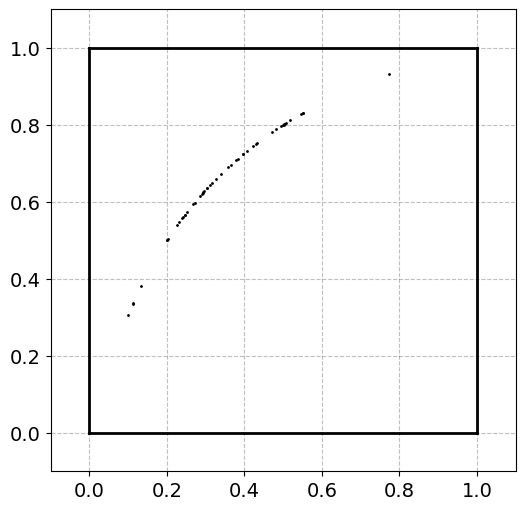

In [14]:
#8

from types import SimpleNamespace

class ExchangeEconomyClass:
    def __init__(self, w1A, w2A):
        par = self.par = SimpleNamespace()

        # a. preferences
        par.alpha = 1/3
        par.beta = 2/3

        # b. endowments
        par.w1A = w1A
        par.w2A = w2A
        par.w1B = 1 - par.w1A 
        par.w2B = 1 - par.w2A

    def utility_A(self, x1A, x2A):
        return x1A**self.par.alpha * x2A**(1-self.par.alpha)

    def utility_B(self, x1B, x2B):
        return x1B**self.par.beta * x2B**(1-self.par.beta)

    def demand_A(self, p1):
        budget = p1*self.par.w1A + self.par.w2A
        return self.par.alpha * budget / p1, (1-self.par.alpha) * budget

    def demand_B(self, p1):
        budget = p1*self.par.w1B + self.par.w2B
        return self.par.beta * budget / p1, (1-self.par.beta) * budget

    def check_market_clearing(self, p1):
        x1A, x2A = self.demand_A(p1)
        x1B, x2B = self.demand_B(p1)

        eps1 = x1A + x1B - 1
        eps2 = x2A + x2B - 1

        return eps1, eps2

def find_market_equilibrium_price(economy):
    # We define a function to find the root of the excess demand
    def excess_demand(p1):
        eps1, _ = economy.check_market_clearing(p1)
        return eps1

    # We use a root finding algorithm to find the market-clearing price
    from scipy.optimize import brentq
    p1_equilibrium = brentq(excess_demand, 0.01, 10)
    return p1_equilibrium

# Generate the random endowments
np.random.seed(123) # for reproducibility
num_elements = 50
w1A_samples = np.random.uniform(low=0, high=1, size=num_elements)
w2A_samples = np.random.uniform(low=0, high=1, size=num_elements)

# Set up the Edgeworth box plot
fig, ax_A = plt.subplots(figsize=(6, 6), dpi=100)


# Calculate and plot equilibrium allocations only
for w1A, w2A in zip(w1A_samples, w2A_samples):
    # Initialize the economy with given endowments
    economy = ExchangeEconomyClass(w1A, w2A)
    
    # Find the market equilibrium price
    p1_equilibrium = find_market_equilibrium_price(economy)
    
    # Calculate the demand at equilibrium price
    x1A_equilibrium, x2A_equilibrium = economy.demand_A(p1_equilibrium)
    
    # Plot the equilibrium allocation for A
    ax_A.scatter(x1A_equilibrium, x2A_equilibrium,marker='o',color='black',s=1)


# Aesthetic settings for the Edgeworth box
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

plt.show()

ADD CONCISE CONLUSION.